В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

# 1.Сгенерируйте данные с помощью кода:

In [ ]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1, random_state=10)

# 2.Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
model_full=cross_val_score(LogisticRegression(), x_data_generated,y_data_generated, scoring='accuracy').mean()
model_full

0.8600000000000001

# 3.Используйте статистические методы для отбора признаков:

## a) Выберите признаки на основе матрицы корреляции.

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [ ]:
x_data_generated.shape, y_data_generated.shape

((100, 20), (100,))

In [ ]:
X= np.column_stack((x_data_generated, y_data_generated))
X.shape[1]

21

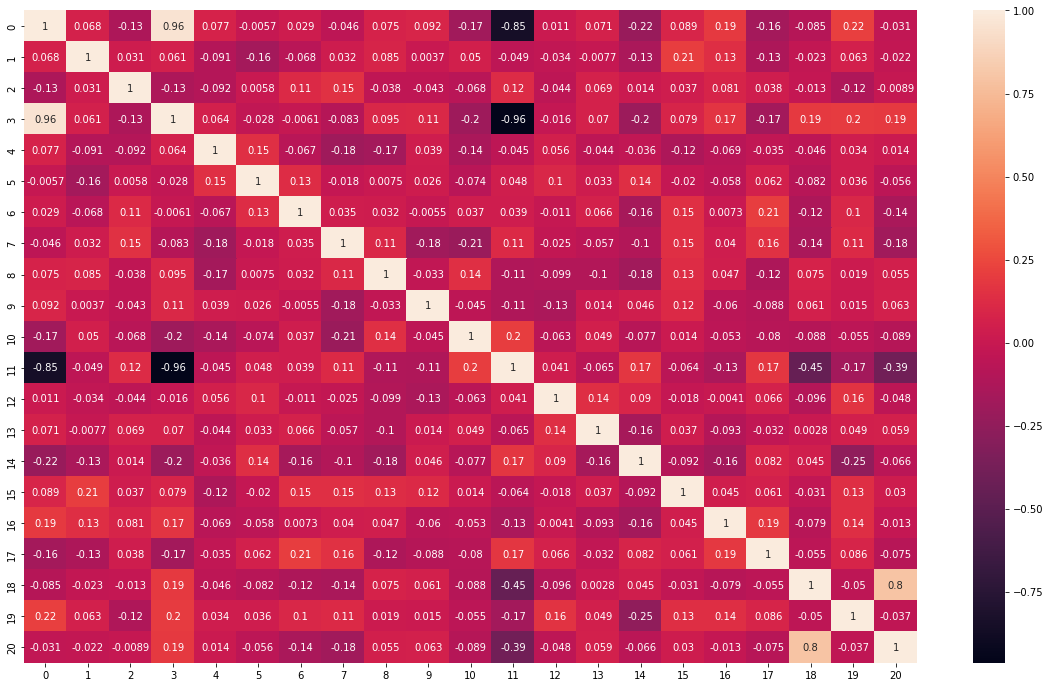

In [ ]:
corr = pd.DataFrame(X).corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.show()

Распределение значений коэффициента линейной корреляции

Слабая:  от 0 до 0,29 и от 0 до -0,29

Средняя:   от 0,3 до 0,69 и от - 0,3 до -0,69

Сильная:   от 0,7 до 1 от - 0,7 до - 1

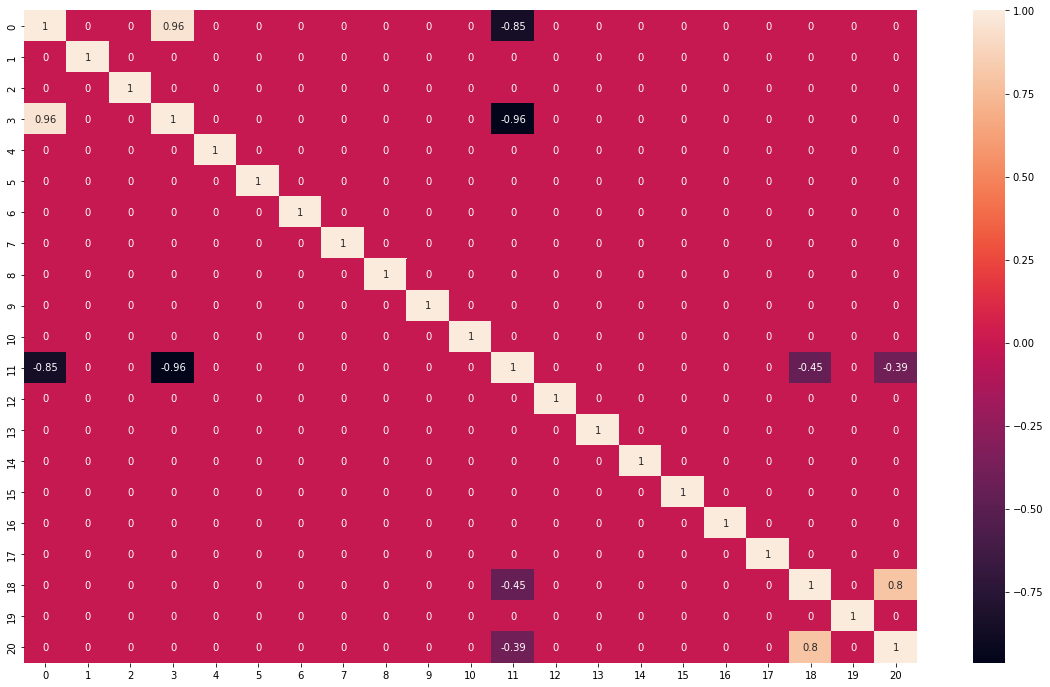

In [ ]:
corr[np.abs(corr) < 0.29] = 0 # обнулим слабые связи
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.show()

Из таблицы корреляции видно, что у целевой переменной 20 есть сильная связь с 11 и 18 признаками.

Также присутствуют пары коррелированных признаков: 0 и 11, 0 и 3, 3 и 11, 11 и 18. Думаю, можно удалить 0 и 3 признак.

In [ ]:
df = pd.DataFrame(X)
df = df.loc[:, (df.columns != 0) & (df.columns != 3)]
df.shape

(100, 19)

In [ ]:
df.head(1)

,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-2.395572,0.503927,-0.364278,0.264395,1.085227,-0.145065,0.892564,0.188331,0.20733,0.78109,0.885775,0.308668,0.356939,0.011023,-0.857523,2.319127,-0.867853,0.980074,0.0


## b) Отсеките низковариативные признаки (VarianceThreshold).

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var = VarianceThreshold(threshold=0.9)
df_1 = var.fit_transform(df)
df_1.shape

(100, 11)

In [ ]:
df_1 = pd.DataFrame(df_1)
df_1.head(1)

,0,1,2,3,4,5,6,7,8,9,10
0,-2.395572,-0.364278,1.085227,0.892564,0.188331,0.20733,0.885775,0.011023,-0.857523,2.319127,-0.867853


## c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [ ]:
X_1 = df_1
X_1.shape[1]

11

In [ ]:
model_stat=cross_val_score(LogisticRegression(), X_1,y_data_generated, scoring='accuracy').mean()
model_stat

0.8800000000000001

# 4.Осуществите отбор признаков на основе дисперсионного анализа: a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
X_2 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)
X_2.shape[1]

5

## b) Повторите п. 2 на отобранных признаках.

In [ ]:
model_SelectKBest=cross_val_score(LogisticRegression(), X_2, y_data_generated, scoring="accuracy").mean()
model_SelectKBest

0.9099999999999999

# 5.Отбор с использованием моделей:

## a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [ ]:
L_SVC = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x_data_generated, y_data_generated)
selector = SelectFromModel(L_SVC, prefit=True)
X_3 = selector.transform(x_data_generated)
X_3.shape[1]

4

In [ ]:
model_selector=cross_val_score(LogisticRegression(), X_3, y_data_generated, scoring="accuracy").mean()
model_selector

0.9

## b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance. c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=1)
clf.fit(x_data_generated, y_data_generated)

RandomForestClassifier(random_state=1)

In [ ]:
imp = pd.Series(clf.feature_importances_)

In [ ]:
imp = imp.sort_values(ascending=False)
imp

18    0.392074
11    0.113320
0     0.059889
3     0.043517
7     0.041507
1     0.030266
13    0.030010
5     0.029716
6     0.029436
19    0.024725
10    0.024662
17    0.024516
12    0.024178
8     0.024143
15    0.021327
2     0.019797
4     0.017709
16    0.017393
9     0.016245
14    0.015573
dtype: float64

In [ ]:
X_4 = pd.DataFrame(x_data_generated)[[18,11,0,3,7]]
X_4.shape[1]

5

In [ ]:
model_rf=cross_val_score(LogisticRegression(), X_4,y_data_generated, scoring='accuracy').mean()
model_rf

0.9099999999999999

# Перебор признаков: a) SequentialFeatureSelector. b) Повторите п. 2 на отобранных признаках.

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=2, direction="forward"
).fit(x_data_generated, y_data_generated)

In [ ]:
X_5 = sfs_forward.transform(x_data_generated)
X_5.shape[1]

2

In [ ]:
model_sfs=cross_val_score(LogisticRegression(), X_5,y_data_generated, scoring='accuracy').mean()
model_sfs

0.9099999999999999

# 6.Сформулируйте выводы по проделанной работе: a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
count_dict = {'полные данные': X.shape,
            'статистические методы отбора': X_1.shape,
            'отбор на основе дисперсионного анализа': X_2.shape,
            'отбор с помощью логистической регрессии': X_3.shape,
            'отбор с помощью модели RandomForest': X_4.shape,
            'отбор с помощью перебора признаков': X_5.shape}
count_dict = pd.Series(count_dict)

accuracy_dict = {'полные данные': model_full,
            'статистические методы отбора': model_stat,
            'отбор на основе дисперсионного анализа': model_SelectKBest,
            'отбор с помощью логистической регрессии': model_selector,
            'отбор с помощью модели RandomForest': model_rf,
            'отбор с помощью перебора признаков': model_sfs}
accuracy_dict = pd.Series(accuracy_dict)

res = pd.DataFrame({'Количество признаков': count_dict, 'Средняя точность модели': accuracy_dict})
res
res.style.highlight_max(color = 'lightgreen', axis = 0)

,Количество признаков,Средняя точность модели
полные данные,"(100, 21)",0.860000
статистические методы отбора,"(100, 11)",0.880000
отбор на основе дисперсионного анализа,"(100, 5)",0.910000
отбор с помощью логистической регрессии,"(100, 4)",0.900000
отбор с помощью модели RandomForest,"(100, 5)",0.910000
отбор с помощью перебора признаков,"(100, 2)",0.910000


В результате работы была существенно повышена точность модели, при этом количество признаков очень значительно уменьшилось.
____________




Отбор признаков полезен по следующим причинам:

Увеличивается скорость обучения модели.

Увеличивается интерпретируемость модели.

Уменьшается риск пререобучения модели.

Увеличивается точность модели.

Помогает ослабить «проклятие размерности».